#ТОЧНЫЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


teta = 2.502
x = np.random.uniform(teta, 2 * teta, 100)
x.sort()
left_exact = np.max(x) / (0.975 ** (1/100) + 1)
right_exact = np.max(x) / (0.025 ** (1/100) + 1)
print("Границы точного доверительного интервала:", round(left_exact, 4), round(right_exact, 4), "\nДлина:", round( - left_exact + right_exact, 4))

print()



Границы точного доверительного интервала: 2.4728 2.5181 
Длина: 0.0453



#АССИМПТОТИЧЕСКИЙ ИНТЕРВАЛ:

In [ ]:
alpha_1_wave = np.mean(x)
alpha_2_wave = np.mean(x * x)

omm_teta_wave = 2/3 * np.mean(x)

omm_ass_left = -1.96 * 2 / 3 * np.sqrt(alpha_2_wave  - alpha_1_wave  ** 2) / np.sqrt(100) + omm_teta_wave
omm_ass_right = 1.96 * 2 / 3 * np.sqrt(alpha_2_wave  - alpha_1_wave  ** 2) / np.sqrt(100) + omm_teta_wave

print("Границы ассимптотического доверительного интервала (ОММ):", round(omm_ass_left, 4), round(omm_ass_right, 4), "\nДлина:", round( - omm_ass_left + omm_ass_right, 4))

print()

Границы ассимптотического доверительного интервала (ОММ): 2.403 2.5937 
Длина: 0.1907



In [ ]:
#Модель не регулярна, поэтому нельзя!
#omp_teta_wave = np.max(x) / 201 * 101
#omp_ass_left = omp_teta_wave * 10 / (1.96 + 10)
#omp_ass_right = omp_teta_wave * 10 / (-1.96 + 10)

#print("Границы ассимптотического доверительного интервала (ОМП):", round(omp_ass_left, 4), round(omp_ass_right, 4), "\nДлина:", round( - omp_ass_left + omp_ass_right, 4))

#print()

#БУТСТРАП!

In [ ]:
def bootstrap_non_par(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]


bts_np = bootstrap_non_par(x)
delta = list()
teta_wave = 2/3 * np.mean(x)
for i in range(1000):
  delta.append(2/3 * np.mean(bts_np[i]) - teta_wave)
delta.sort()
print("Непараметрический Бутстрап для доверительного интервала (ОММ):", round(teta_wave - delta[974], 4), round(teta_wave - delta[24], 4))
print("Длина:", round(- round(teta_wave - delta[974], 4) + round(teta_wave - delta[24], 4), 4))
print()

Непараметрический Бутстрап для доверительного интервала (ОММ): 2.4093 2.5985
Длина: 0.1892



In [ ]:
def bootstrap_par(data, n_bootstrap_samples=50000):
    return [np.random.uniform(teta, 2 * teta, 100) for _ in range(n_bootstrap_samples)]


bts_p = bootstrap_par(x)
tetas = list()
for i in range(50000):
  tetas.append(2/3 * np.mean(bts_p[i]))
tetas.sort()
print("Параметрический Бутстрап для доверительного интервала (ОММ):", round(tetas[48749], 4), round(tetas[1249], 4))
print("Длина:", round(round(tetas[48749], 4) - round(tetas[1249], 4), 4))
print()

Параметрический Бутстрап для доверительного интервала (ОММ): 2.5962 2.4079
Длина: 0.1883



In [ ]:

bts_np = bootstrap_non_par(x)
delta_2 = list()
omp_teta_wave = np.max(x) / 201 * 101
for i in range(1000):
  delta_2.append(101/201 * np.max(bts_np[i]) - omp_teta_wave)
delta_2.sort()
print("Непараметрический Бутстрап для доверительного интервала (ОМП):", round(omp_teta_wave - delta_2[974], 4), round(omp_teta_wave - delta_2[24], 4))
print("Длина:", round(- round(omp_teta_wave - delta_2[974], 4) + round(omp_teta_wave - delta_2[24], 4), 4))
print()

Непараметрический Бутстрап для доверительного интервала (ОМП): 2.4848 2.5119
Длина: 0.0271



In [ ]:
bts_p = bootstrap_par(x)
tetas_2 = list()
for i in range(50000):
  tetas_2.append(101/201 * np.max(bts_p[i]))
tetas_2.sort()
print("Параметрический Бутстрап для доверительного интервала (ОММ):", round(tetas_2[48749], 4), round(tetas_2[1249], 4))
print("Длина:", round(round(tetas_2[48749], 4) - round(tetas_2[1249], 4), 4))
print()

Параметрический Бутстрап для доверительного интервала (ОММ): 2.5141 2.469
Длина: 0.0451



#РИСУНОЧКИ

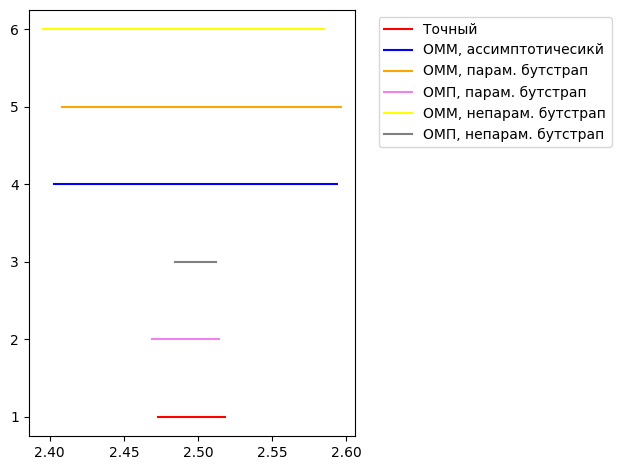

In [ ]:
omp_teta_wave = np.max(x) / 201 * 101
x_exact = np.array([left_exact, right_exact])
x_omm_ass = np.array([omm_ass_left, omm_ass_right])
#x_omp_ass = np.array([omp_ass_left, omp_ass_right])
x_par_bootstrap_omm = ([tetas[48749], tetas[1249]])
x_par_bootstrap_omp = ([tetas_2[48749], tetas_2[1249]])
x_nonpar_bootstrap_omm = ([teta_wave - delta[974], teta_wave - delta[24]])
x_nonpar_bootstrap_omp = ([omp_teta_wave - delta_2[974], omp_teta_wave - delta_2[24]])

y_exact = np.array([1, 1])
y_par_bootstrap_omp = np.array([2, 2])
y_nonpar_bootstrap_omp = np.array([3, 3])
y_omm_ass = np.array([4, 4])
y_par_bootstrap_omm = ([5, 5])
y_nonpar_bootstrap_omm = ([6, 6])

plt.plot(x_exact, y_exact, color = "red", label = "Точный")
plt.plot(x_omm_ass, y_omm_ass, color = "blue", label = "ОММ, ассимптотичесикй")
#plt.plot(x_omp_ass, y_omp_ass, color = "green", label = "ОМП, ассимптотичесикй")
plt.plot(x_par_bootstrap_omm, y_par_bootstrap_omm, color = "orange", label = "ОММ, парам. бутстрап")
plt.plot(x_par_bootstrap_omp, y_par_bootstrap_omp, color = "violet", label = "ОМП, парам. бутстрап")
plt.plot(x_nonpar_bootstrap_omm, y_nonpar_bootstrap_omm, color = "yellow", label = "ОММ, непарам. бутстрап")
plt.plot(x_nonpar_bootstrap_omp, y_nonpar_bootstrap_omp, color = "grey", label = "ОМП, непарам. бутстрап")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

ОМП дает плохие интервалы, потому что модель не регулярна(